# Loading the data from github

In [133]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/poprawne_dane.csv"

data_raw = pd.read_csv(url)

In [134]:
data_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
8,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
9,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you want to predict if you decide to create a machine learning model (see task description).

In [135]:
len(data_raw)

6466

In [136]:
data_raw.isnull().values.any()

np.False_

In [137]:
def text_split(input,at):
    parts = input.split('/')
    return parts[at]

data_raw["Deck"]=data_raw["Cabin"].map(lambda x:text_split(x,0)).values

data_raw["Num"] = data_raw["Cabin"].map(lambda x: text_split(x,1)).values

data_raw["Side"] = data_raw["Cabin"].map(lambda x: text_split(x,2)).values

# Exploring Categorical Columns

### First glimpse at the cateogrical data

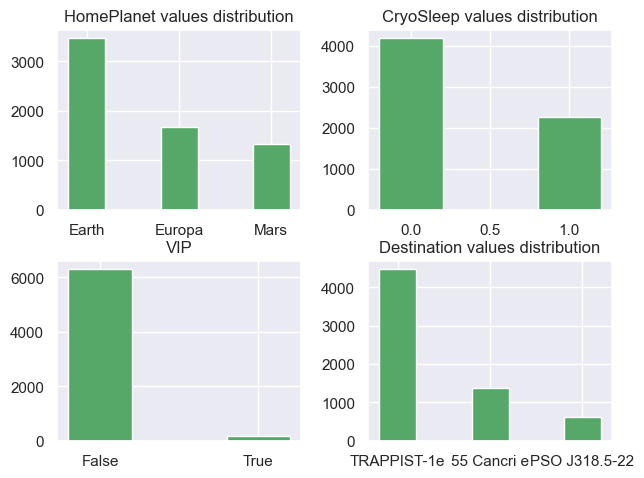

In [138]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()


home_planet= data_raw["HomePlanet"].value_counts()
cryosleep = data_raw["CryoSleep"].value_counts()
destination = data_raw["Destination"].value_counts()
vip = data_raw["VIP"].value_counts()

axs[0,0].set_title("HomePlanet values distribution")
axs[0,0].bar(home_planet.index,home_planet.values,width=0.4,color='g')

axs[0,1].set_title("CryoSleep values distribution")
axs[0,1].bar(cryosleep.index,cryosleep.values,width=0.4,color='g')

axs[1,1].set_title("Destination values distribution")
axs[1,1].bar(destination.index,destination.values,width=0.4,color='g')

axs[1,0].set_title("VIP")
axs[1,0].bar(["False","True"],vip.values,width=0.4,color='g')
plt.show()


## Most choosen routes

[Text(0, 0.5, 'Earth'), Text(0, 1.5, 'Europa'), Text(0, 2.5, 'Mars')]

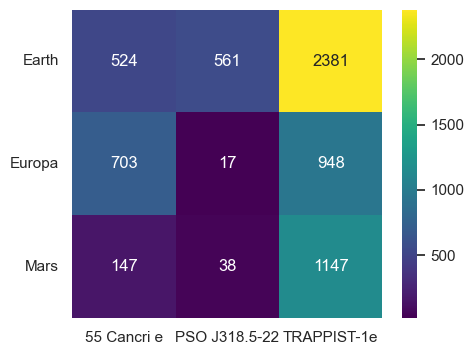

In [139]:
data_counts = data_raw.groupby(["HomePlanet","Destination"]).size().unstack(fill_value=0)


planets = data_counts.columns
destinations = data_counts.index
tablica = data_counts.values

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(tablica,annot=True,cmap="viridis",fmt="d",xticklabels=planets,yticklabels=destinations,ax=ax)


ax.set_yticklabels(rotation=0,labels=destinations)


## Average expenses for vip and non-vip passengers on each atraction

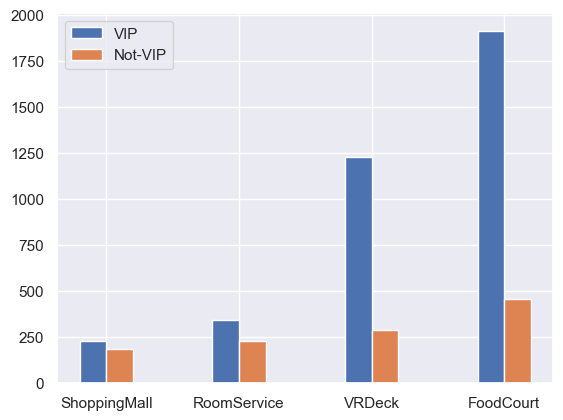

In [140]:
data_raw["Sum"]= data_raw[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
data_raw

x = data_raw.groupby(["VIP"])[["RoomService","VRDeck","ShoppingMall","FoodCourt"]].mean()

vip_true = x.loc[True].sort_values().to_dict()

vip_false = x.loc[False].sort_values().to_dict()

x_ind = np.arange(len(vip_false.keys()))

plt.bar(x_ind-0.1,vip_true.values(),label="VIP",width=0.2)
plt.bar(x_ind+0.1,vip_false.values(),label="Not-VIP",width=0.2)
plt.xticks(np.arange(4),vip_false.keys())
plt.legend()
plt.show()

## VIP's choosen destination

Text(0.5, 1.0, 'VIP choosen destination')

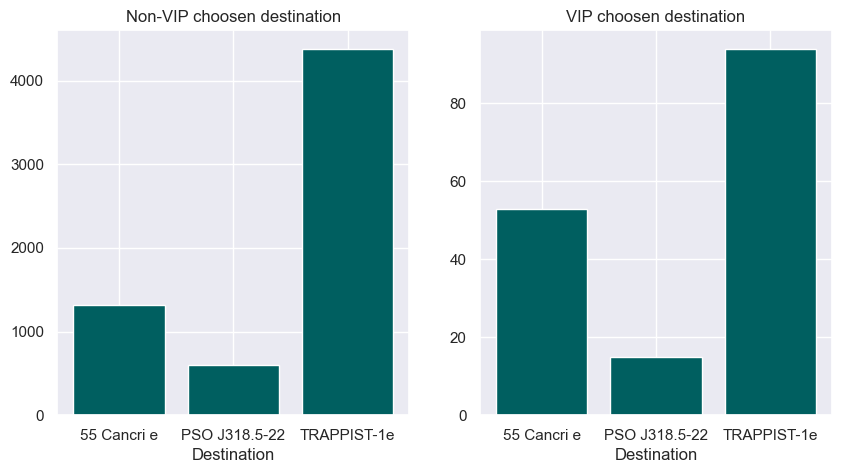

In [141]:
x = data_raw.groupby(["VIP"])["Destination"].value_counts().unstack()
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].bar(x.iloc[0].index,x.iloc[0].values,color="#005F60")
ax[0].set_xlabel('Destination')
ax[0].set_title("Non-VIP choosen destination")
ax[1].bar(x.iloc[1].index,x.iloc[1].values,color="#005F60")
ax[1].set_xlabel('Destination')
ax[1].set_title("VIP choosen destination")

## VIP's HomePlanet

[3466. 1558. 1280.]


<BarContainer object of 3 artists>

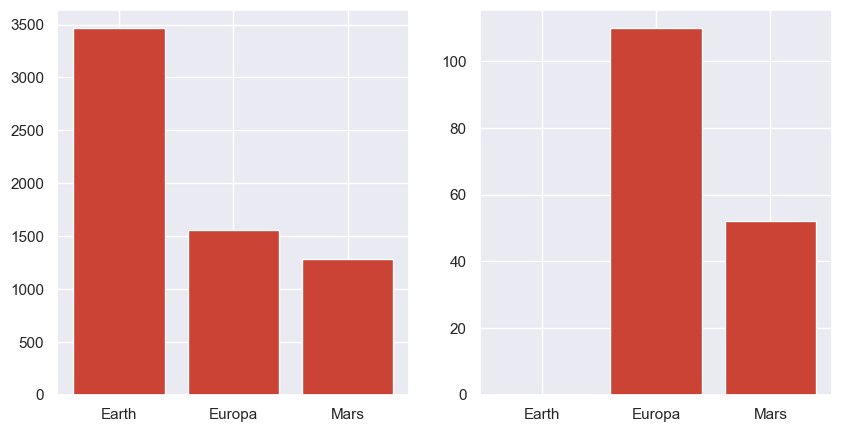

In [142]:
x = data_raw.groupby(["VIP"])["HomePlanet"].value_counts().unstack()
x =x.fillna(0)
print(x.iloc[0].values)

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].bar(x.iloc[0].index,x.iloc[0].values,color="#cb4335")
ax[1].bar(x.iloc[1].index,x.iloc[1].values,color="#cb4335")



## Expenses and Age

C:\Users\bzabk\AppData\Local\Temp\ipykernel_23536\791728020.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = data_raw.groupby(["Age_group"])["Sum"].sum()
C:\Users\bzabk\AppData\Local\Temp\ipykernel_23536\791728020.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(rotation=45,labels=x["Age_group"])


Text(0.5, 1.0, 'Percentage share of each age group in total expenditure')

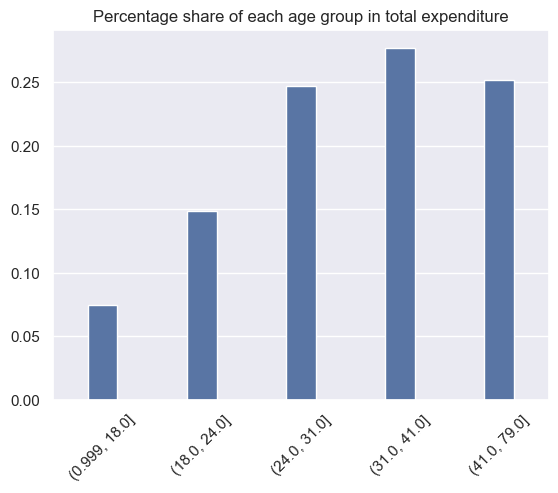

In [143]:
income = data_raw["Sum"].sum()

data_raw["Age_group"] = pd.qcut(data_raw["Age"],q=5)
x = data_raw.groupby(["Age_group"])["Sum"].sum()
x = x/income
x = x.reset_index()
sns.set_theme(style="darkgrid")
ax = sns.barplot(x,x="Age_group",y="Sum",width=0.3)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(rotation=45,labels=x["Age_group"])
ax.set_title('Percentage share of each age group in total expenditure')

C:\Users\bzabk\AppData\Local\Temp\ipykernel_23536\2347167156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()


Text(0, 0.5, '')

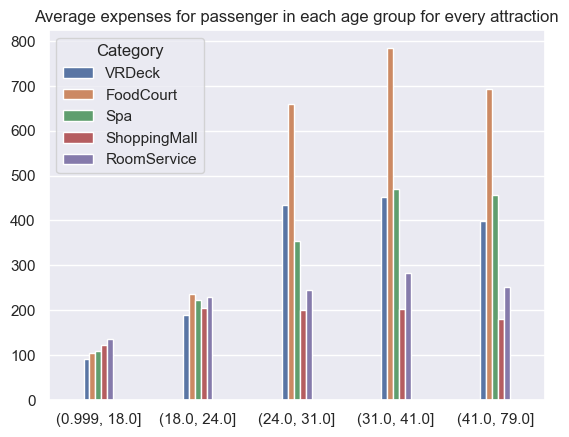

In [144]:

x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()
x = x.reset_index()
x=pd.melt(x,id_vars='Age_group', value_vars=["FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"],
                   var_name='Category', value_name='Value')

x=x.sort_values(by=["Age_group","Value"],ascending=[True,True])
z = sns.barplot(data=x,x="Age_group",y="Value",width=0.3,hue='Category',dodge=True)
z.set_title("Average expenses for passenger in each age group for every attraction")
z.set_xlabel('')
z.set_ylabel('')

## Deck with expenses summary

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'T')]

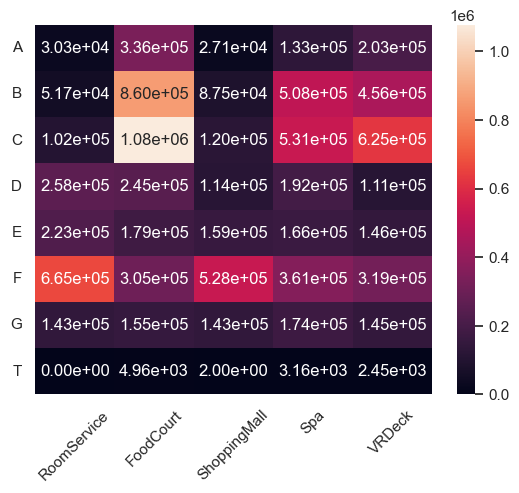

In [145]:
def get_second(input):
    sep = input.split(" ")
    return sep[1]

data_raw["Second_Name"] = data_raw["Name"].apply(get_second)
x = data_raw.groupby(["Second_Name","Deck"])
x = data_raw.groupby(["Deck"])[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum()

map = sns.heatmap(x.values,xticklabels=x.columns,yticklabels=x.index,fmt=".2e",annot=True)
map.set_xticklabels(rotation=45,labels=x.columns)
map.set_yticklabels(rotation=0,labels=x.index)

## More people who were transported were seated at the Starboard site, and conversly More people who were transported were seated at the Port site,

[]

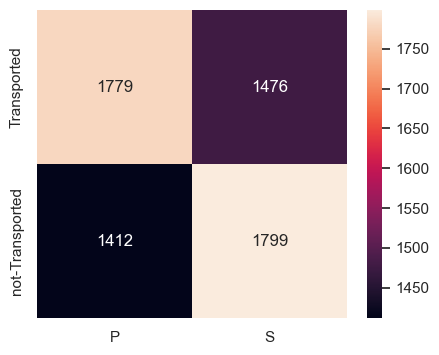

In [146]:
df = data_raw
df_home_cry = df.groupby(["Transported","Side"]).size().unstack(fill_value=0)

df_home_cry.columns
df_home_cry.index
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_home_cry.values,annot=True,fmt="d",ax=ax,xticklabels=df_home_cry.columns,yticklabels=["Transported","not-Transported"])
plt.plot()

Transported  False  True 
VIP                      
False         3153   3151
True           102     60


<Axes: >

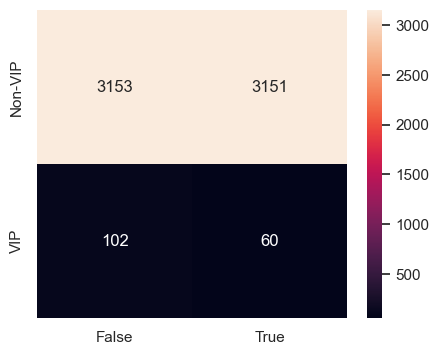

In [147]:
x  = data_raw.groupby(["VIP"])["Transported"].value_counts().unstack()
fig,ax = plt.subplots(figsize=(5,4))
print(x)

sns.heatmap(x.values,xticklabels=x.columns,yticklabels=["Non-VIP","VIP"],annot=True,fmt="g")

## Percentage share of transported and not transported passengers in each deck

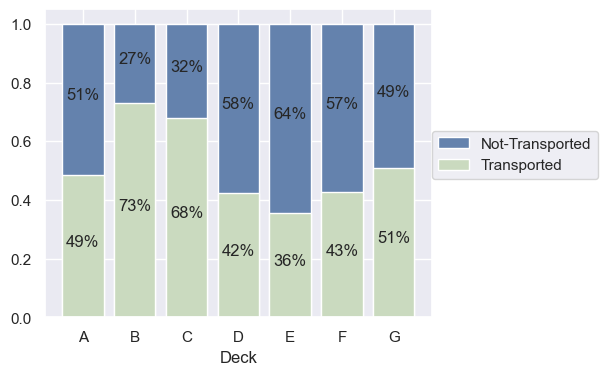

In [148]:
temp = data_raw.groupby(["Deck","Transported"]).size().unstack().reset_index()
temp.columns = temp.columns.map(str)
temp["True"] = temp["True"]/(temp["True"]+temp["False"])
temp["False"]= 1-temp["True"]
temp = temp[:-1]
temp["Sum"]=1
fig,ax = plt.subplots(figsize=(5,4))

ax.bar(temp['Deck'],np.ones(len(temp)),label='Not-Transported',color="#6482AD")
ax.bar(temp['Deck'],temp['True'],label='Transported',color="#CADABF")
ax.set_xlabel('Deck')
for i in range(len(temp)):
    ax.text(i, temp.loc[i, "True"]/2, s=f"{int(round(temp.loc[i, 'True'], 2) * 100)}%", ha='center')

for i in range(len(temp)):
    ax.text(i,(temp.loc[i,"Sum"]-temp.loc[i,"True"])/2+temp.loc[i,'True'],s=f"{round((round(temp.loc[i,'False']*100,2)))}%",ha='center')
ax.legend(loc=(1,0.45))

## Comparing Age distribution among VIP and None-VIP passengers

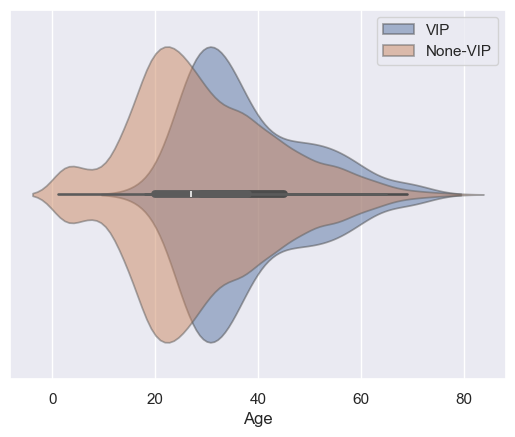

In [149]:
vip_data = data_raw[data_raw["VIP"]==True]
non_vip_data = data_raw[data_raw["VIP"]==False]
x = vip_data["Age"].mean()
sns.violinplot(vip_data["Age"],alpha=0.5,orient='h',label="VIP")
sns.violinplot(non_vip_data["Age"],alpha=0.5,orient='h',label="None-VIP")
plt.legend()

## Percentage share of each age group among total passengers on each deck

In [150]:
temp = data_raw.groupby('Deck')['Age_group'].value_counts().unstack().reset_index()
temp.columns = temp.columns.map(str)

temp["Sum"]=temp.iloc[:,1:].sum(axis=1)
temp = temp.drop([7])
for col in temp.columns[1:]:
     temp[col] = temp[col]/temp['Sum']
data_temp =temp.iloc[:,1:].cumsum(axis=1)
data_temp.columns = data_temp.columns.map(str)
data_temp = data_temp.drop(columns="Sum")

def find_level(df: pd.DataFrame):
    x = pd.DataFrame(index =df.index)
    for i,column in enumerate(df.columns):
        if i ==0:
            x[column]=df[column]/2
        else:
            x[column] = df.iloc[:,i-1]+(df.iloc[:,i]-df.iloc[:,i-1])/2
    return x
x = find_level(data_temp)

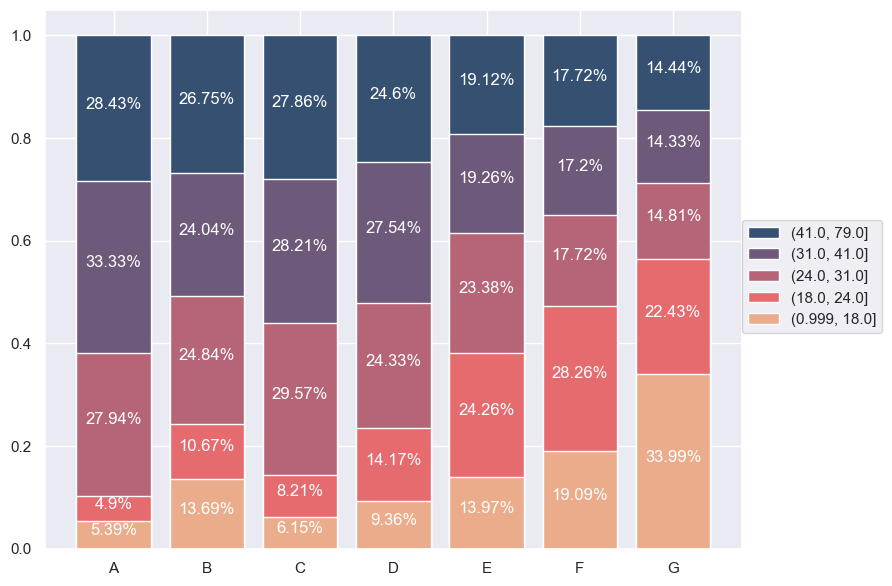

In [151]:
fig, ax = plt.subplots(figsize=(9, 7))

colors = ['#355070','#6d597a','#b56576','#e56b6f','#eaac8b']

x_cords = np.arange(len(data_temp))

for i,col in enumerate(reversed(data_temp.columns[:])):

    ax.bar(x_cords,data_temp[col],label=col,color=colors[i])

    for j,value in enumerate(temp[col]):
        
        ax.text(j,x.loc[j,col],s=f"{str(round(value*100,2))}%",ha='center',color="white")
    
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(temp["Deck"])

plt.legend(loc=(1,0.4))

In [152]:
import matplotlib.pyplot as plt
data_young = data_raw.query("Age<=18")

print(data_young["FoodCourt"].mean())
print(data_raw['FoodCourt'].mean())

104.82835249042145
489.3287967831735


## Passengers under 13 have not made any payments 

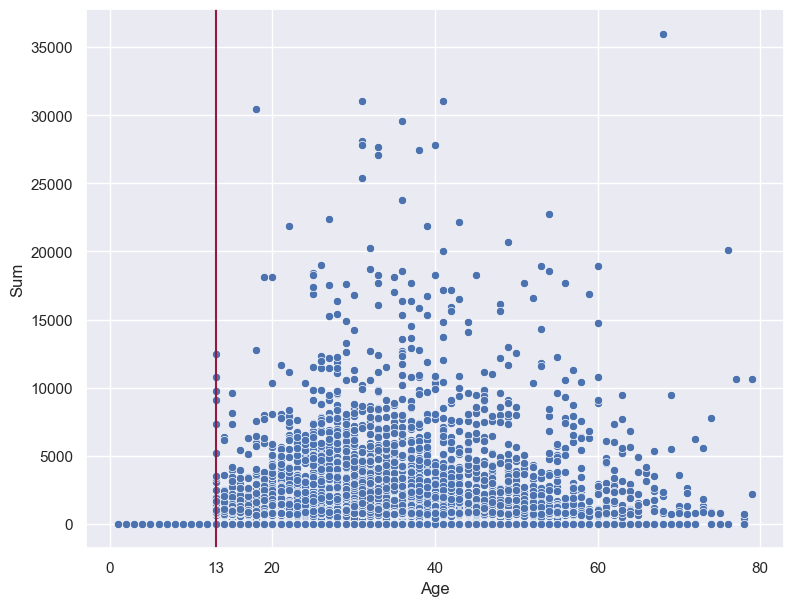

In [153]:
fig,ax = plt.subplots(figsize=(9,7))
sns.scatterplot(data_raw,y="Sum",x="Age",ax=ax)
xticks = [0,13,20,40,60,80]
ax.set_xticks(xticks)
ax.axline((13,0),(13,35000),color="#921A40")

In [154]:
data_raw.select_dtypes(include='number').corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Sum
Age,1.000000,0.062721,0.129327,0.030349,0.117256,0.097779,0.181945
RoomService,0.062721,1.000000,-0.015785,0.058297,0.010445,-0.028078,0.221435
FoodCourt,0.129327,-0.015785,1.000000,-0.014259,0.214667,0.215692,0.752788
ShoppingMall,0.030349,0.058297,-0.014259,1.000000,0.020371,-0.001426,0.214243
Spa,0.117256,0.010445,0.214667,0.020371,1.000000,0.148086,0.591962
VRDeck,0.097779,-0.028078,0.215692,-0.001426,0.148086,1.000000,0.574436
Sum,0.181945,0.221435,0.752788,0.214243,0.591962,0.574436,1.000000


In [155]:
from scipy.stats import pearsonr

pearsonr(data_raw["Transported"],data_raw["VIP"])

PearsonRResult(statistic=np.float64(-0.04047086280616599), pvalue=np.float64(0.0011338248180573296))

In [156]:
import scipy.stats as stats

stats.f_oneway(data_raw["ShoppingMall"],data_raw["Age"])

F_onewayResult(statistic=np.float64(444.9487443619823), pvalue=np.float64(3.890623838495366e-97))

In [157]:
data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum,Age_group,Second_Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0,"(31.0, 41.0]",Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0,"(18.0, 24.0]",Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0,"(41.0, 79.0]",Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0,"(31.0, 41.0]",Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0,"(0.999, 18.0]",Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,8536.0,"(31.0, 41.0]",Noxnuther
6462,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,0.0,"(0.999, 18.0]",Mondalley
6463,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1873.0,"(24.0, 31.0]",Connon
6464,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,4637.0,"(31.0, 41.0]",Hontichre


## Removing Outliers from DataFrame

#### Removing Cabin, PassengerId, Name Column

In [158]:
data_raw = data_raw.drop(columns=["Cabin","Name","Second_Name","PassengerId"])

#### Deck column

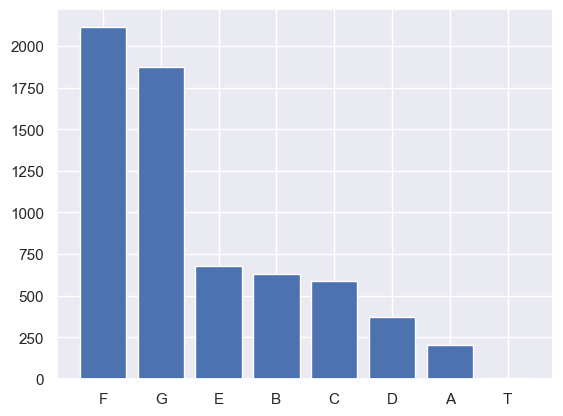

In [159]:
plt.bar(data_raw["Deck"].value_counts().index,data_raw["Deck"].value_counts().values)
data_without_outliers = data_raw[data_raw["Deck"]!="T"]

## Model 1 log function on all numerical columns+one hot encoding on all categorical values+numerical Age+ turning Num to groups+without sum column

In [187]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
model_1 = deepcopy(data_raw)

model_1["Num"] = pd.qcut(model_1["Num"].astype(int),3)
model_1 = model_1.drop(columns=["Age_group","Sum"])
numerical_col = ["Age","RoomService","FoodCourt","ShoppingMall","Spa",
                                    "VRDeck"]
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Num","Side"]
model1_X = model_1.drop(columns="Transported")
model1_Y = model_1[["Transported"]]
model1_X_train, model1_X_test, model1_Y_train, model1_Y_test = train_test_split(model1_X,model1_Y)


numerical_features = Pipeline(
    steps=[("scaler",StandardScaler())]
)

categorical_features = Pipeline(
    steps=[('encoder',OneHotEncoder())]
)

preprocessor = ColumnTransformer(
    transformers = [('num',numerical_features,numerical_col),
    ('cat',categorical_features,categorical_col)]
)
parameters = {
    "classifier__n_estimators":[50,100,200],
    "classifier__max_depth":[5,7,9]
}
clf = Pipeline(
    steps=[("preprocess",preprocessor),("classifier",RandomForestClassifier())]
)


search = GridSearchCV(clf,parameters,cv=5, n_jobs=-1, verbose=2)
search.fit(model1_X_train,model1_Y_train)
#clf.fit(model1_X_train,model1_Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\bzabk\OneDrive\Pulpit\Recruit\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Deck',
                                                                          'Num',
                                                                          'Side'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 7, 9],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [188]:
search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP', 'Deck',
                                                   'Num', 'Side'])])),
                ('classifier', RandomForestClassifier(max_depth=9))])

(array([5.997e+03, 3.000e+02, 9.200e+01, 4.200e+01, 1.400e+01, 8.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 1.000e+00]),
 array([   0.,  992., 1984., 2976., 3968., 4960., 5952., 6944., 7936.,
        8928., 9920.]),
 <BarContainer object of 10 artists>)

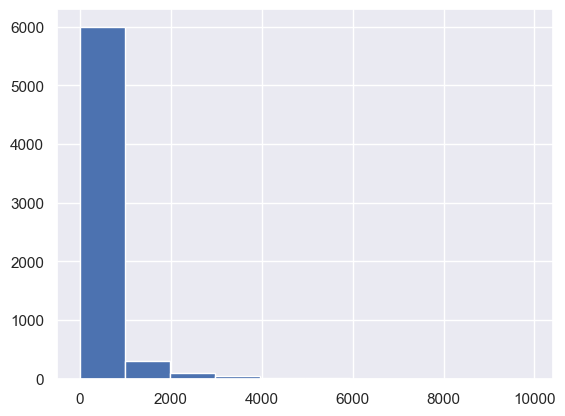

In [ ]:
plt.hist(data_without_outliers["RoomService"])

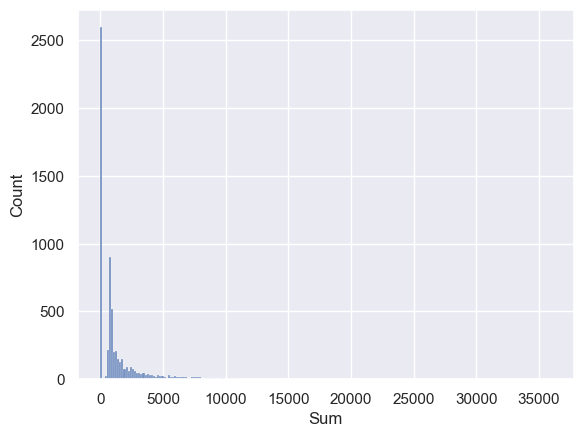

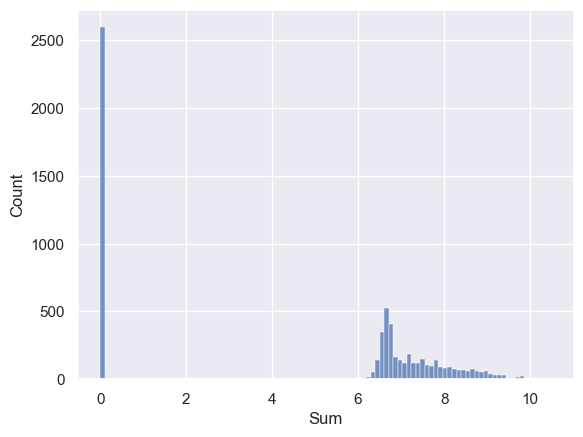

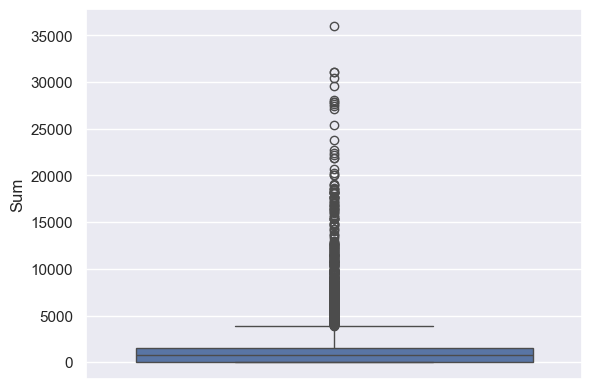

In [ ]:
from math import sqrt
from numpy import log1p
#1 sqrt method
sns.histplot(data_raw["Sum"])
plt.show()
sns.histplot(data_raw["Sum"].apply(log1p),bins=100)
plt.show()
sns.boxplot(data_raw["Sum"])
plt.show()



## Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
labels = data_raw["Transported"]
data_train = data_raw.drop(columns=["Transported",'Cabin','PassengerId','Name',"Second_Name","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck","Age_group"])
X_train,X_test,Y_train,Y_test = train_test_split(data_train,labels)

KeyError: "['Cabin'] not found in axis"

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [ ]:
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Num,Side,Sum
0,Earth,False,TRAPPIST-1e,33.0,False,G,338,P,888.0
1,Earth,True,PSO J318.5-22,21.0,False,G,189,P,0.0
2,Europa,False,TRAPPIST-1e,54.0,False,C,196,S,8420.0
3,Europa,False,TRAPPIST-1e,33.0,False,C,53,P,7035.0
4,Europa,True,55 Cancri e,30.0,False,B,260,S,0.0
...,...,...,...,...,...,...,...,...,...
1612,Europa,False,55 Cancri e,36.0,False,C,338,S,23774.0
1613,Mars,False,TRAPPIST-1e,38.0,False,D,6,S,3722.0
1614,Europa,True,TRAPPIST-1e,30.0,False,C,260,S,0.0
1615,Earth,False,55 Cancri e,21.0,False,G,341,S,810.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
scaler = Normalizer()



encoded_X_train = enc.fit_transform(X_train[["CryoSleep","HomePlanet","Destination",'Deck']])
sum_scaled = scaler.fit_transform(X_train[["Sum"]])
age_scaled = scaler.fit_transform(X_train[["Age"]])
encoded_X_train = pd.concat([pd.DataFrame(sum_scaled),encoded_X_train],axis=1)


encoded_X_test = enc.fit_transform(X_test[["CryoSleep","HomePlanet","Destination",'Deck']])
sum_scaled = scaler.fit_transform(X_test[["Sum"]])
age_scaled = scaler.fit_transform(X_test[["Age"]])
encoded_X_test = pd.concat([pd.DataFrame(sum_scaled),encoded_X_test],axis=1)

In [ ]:
encoded_X_test

,0,CryoSleep_False,CryoSleep_True,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1613,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1614,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1615,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
encoded_X_train.columns = encoded_X_train.columns.astype(str)
encoded_X_test.columns = encoded_X_test.columns.astype(str)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators=200,max_depth=10)
classifier.fit(encoded_X_train,Y_train)

preds = classifier.predict(encoded_X_test)
score = accuracy_score(preds,Y_test)
score

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Deck_T
